In [1]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask
from nltools.stats import fdr, threshold, fisher_r_to_z, one_sample_permutation
from sklearn.metrics import pairwise_distances
from nilearn.plotting import plot_glass_brain, plot_stat_map
import nilearn.plotting as plotting
from nilearn import datasets
from nilearn import plotting

In [8]:
# dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr50-2mm')
insula_idx = 1
acc_idx = 28
precuneous_cortex = 31
dataset.labels[31]

'Precuneous Cortex'

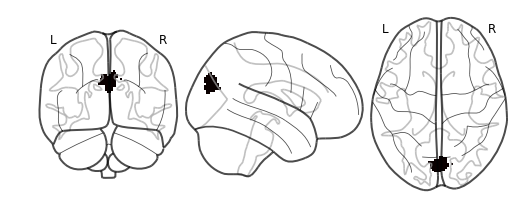

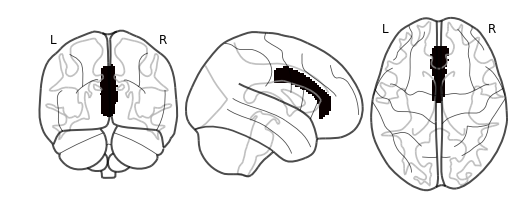

In [7]:
parcellations = Brain_Data(dataset.maps)
expanded_parcellations = expand_mask(parcellations)
plot_glass_brain(expanded_parcellations[31].to_nifti())
plot_glass_brain(expanded_parcellations[acc_idx].to_nifti())

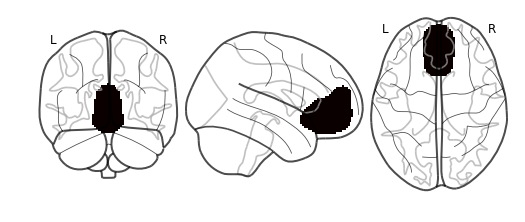

In [36]:
vmpfc_mask = Brain_Data('VMPFC_tor.nii')
plot_glass_brain(vmpfc_mask.to_nifti())

In [108]:
expanded_parcellations[insula_idx]

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

first_level_conditiononly_1022519/cp001
['first_level_conditiononly_1022519/cp001/congruent.nii.gz', 'first_level_conditiononly_1022519/cp001/incongruent.nii.gz', 'first_level_conditiononly_1022519/cp001/noprime.nii.gz']
loading brains
calculating_distance
first_level_conditiononly_1022519/cp002
['first_level_conditiononly_1022519/cp002/congruent.nii.gz', 'first_level_conditiononly_1022519/cp002/incongruent.nii.gz', 'first_level_conditiononly_1022519/cp002/noprime.nii.gz']
loading brains
calculating_distance
first_level_conditiononly_1022519/cp003
['first_level_conditiononly_1022519/cp003/congruent.nii.gz', 'first_level_conditiononly_1022519/cp003/incongruent.nii.gz', 'first_level_conditiononly_1022519/cp003/noprime.nii.gz']
loading brains
calculating_distance
first_level_conditiononly_1022519/cp004
['first_level_conditiononly_1022519/cp004/congruent.nii.gz', 'first_level_conditiononly_1022519/cp004/incongruent.nii.gz', 'first_level_conditiononly_1022519/cp004/noprime.nii.gz']
loading 

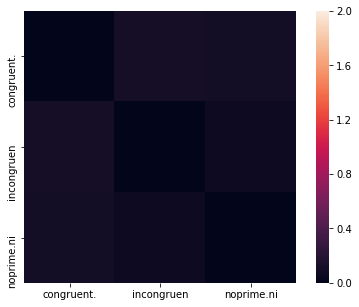

In [9]:
data_dir = 'first_level_conditiononly_1022519/'
sub_list = glob.glob(os.path.join(data_dir,'*'))

mask = expanded_parcellations[precuneous_cortex]


distance = []
for sub in sub_list[:]:
    print(sub)
    # only get betas of relevance
    file_list = glob.glob(os.path.join(sub, '*con*'))
    file_list.append(glob.glob(os.path.join(sub, '*prime*'))[0])
    print(file_list)
    #reordered list
    #load brain data
    print('loading brains')
    beta = Brain_Data(file_list)
    #get labels
    condition_labels = [file[40:50] for file in file_list]
    #calculate distance 
    print('calculating_distance')
    distance_subject = beta.apply_mask(mask).distance(method='correlation')
    distance_subject.labels = condition_labels
    #append
    distance.append(distance_subject)
    
summed_scores = distance[-1].data
for i in range(len(distance)-1):
    summed_scores += distance[i].data
    
averaged_scores = summed_scores/len(distance)

avg_adjacency = Adjacency(averaged_scores)
avg_adjacency.labels = condition_labels
fig = avg_adjacency.plot(vmax=2, vmin=0)
    

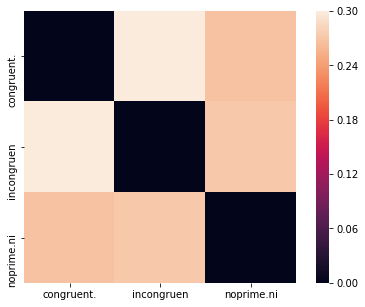

In [133]:
averaged_scores = summed_scores/len(distance)

avg_adjacency = Adjacency(averaged_scores)
avg_adjacency.labels = condition_labels
fig = avg_adjacency.plot()

In [10]:
avg_adjacency.data

array([0.11021904, 0.09445846, 0.07011303])

In [98]:
dmn_distance

[]

In [89]:
file_list

['first_level_conditiononly_1022519/cp001/congruent.nii.gz',
 'first_level_conditiononly_1022519/cp001/incongruent.nii.gz',
 'first_level_conditiononly_1022519/cp001/noprime.nii.gz']